In [1]:
import os
import pandas as pd
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import fiona
import pyproj
import contextily
import plotly.express as px
from shapely import wkt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
path = "/srv/data/my_shared_data_folder/cpr/"

dir_list = os.listdir(path)
#dir_in = os.listdir(os.getcwd())
#directory = pd.Series(dir_in)
#print(dir_in)
print(dir_list)

['california_counties_census_data.csv', 'cleaned_county_data.csv', 'R13391251_SL140.csv', 'R13391250_SL050.csv', 'california_tracts.gpkg', 'pur2020_nonag.parquet', 'cleaned_tract_data.csv', 'cleaned_elsd_data.csv', 'california_zctas.gpkg', 'california_counties.gpkg', 'vision_providers_geocoded.csv', 'california_watersheds.gpkg', 'california_zcta_census_data.csv', 'R13391252_SL950.csv', 'new_test_file.gpkg', 'readme.md', 'california_elementary_school_districts.gpkg', 'pur2020_ag.parquet', 'california_tracts_census_data.csv', 'cleaned_zcta_data.csv', 'california_elementary_schools_census_data.csv', 'R13391293_SL860.csv', 'another_copy_pur2020_ag.parquet']


# Objective: make an autoplotter that functions on the feature level for Counties

In [2]:
Geo = gpd.read_file('../data/demographic_merge.geojson')

In [4]:
Geo.loc[(Geo.geometry_type == 'tract') & (Geo.county_name == 'Fresno')]

,STATEFP,COUNTYFP,Geo_FIPS,FIPS,NAME,Geo_QNAME,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,state,state_fips,county,tract,geoid,area_name,area_land,total_pop,housing_units,owner_occupied_housing_units,persons_no_health_insurance,families,families_income_below_poverty_level,median_household_income,nh_white_alone,nh_black_or_african_american_alone,nh_american_indian_and_alaska_native_alone,nh_asian_alone,nh_native_hawaiian_and_other_pacific_islander_alone,nh_other,nh_two_or_more,hispanic_or_latino,households_receiving_assistance,households,pct_owner_occupied,pct_no_health_insurance,pct_families_income_below_poverty_level,pct_households_receiving_assistance,pct_nh_white_alone,pct_nh_black_or_african_american_alone,pct_nh_american_indian_and_alaska_native_alone,pct_nh_asian_alone,pct_nh_native_hawaiian_and_other_pacific_islander_alone,pct_nh_other,pct_nh_two_or_more,pct_hispanic_or_latino,geometry_type,county_name,COUNTYNS,GEOID,NAMELSAD,LSAD,CLASSFP,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,geometry
6395,06,019,008100,6019008100,81,Census Tract 81,G5020,7718823,0,+36.1419701,-120.3511622,ca,6.0,19,8100.0,14000US06019008100,Census Tract 81,2.976916,6875.0,2213.0,1136.0,644.0,1757.0,253.0,63104.0,1884.0,58.0,279.0,101.0,50.0,12.0,114.0,4377.0,2226.0,2137.0,0.513330,0.093673,0.143995,1.041647,0.274036,0.008436,0.040582,0.014691,0.007273,0.001745,0.016582,0.636655,tract,Fresno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-120.36630 36.12389, -120.3663..."
6396,06,019,007901,6019007901,79.01,Census Tract 79.01,G5020,2619931,0,+36.1300452,-120.2449273,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tract,Fresno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-120.23568 36.12298, -120.2358..."
6397,06,019,008000,6019008000,80,Census Tract 80,G5020,16382750,0,+36.1571780,-120.3728944,ca,6.0,19,8000.0,14000US06019008000,Census Tract 80,6.318272,5218.0,1937.0,1100.0,250.0,1147.0,182.0,66964.0,2057.0,37.0,5.0,88.0,0.0,0.0,26.0,3005.0,1151.0,1743.0,0.567888,0.047911,0.158675,0.660356,0.394212,0.007091,0.000958,0.016865,0.000000,0.000000,0.004983,0.575891,tract,Fresno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-120.39095 36.17608, -120.3909..."
6398,06,019,007902,6019007902,79.02,Census Tract 79.02,G5020,1821347145,976972,+36.2042510,-120.4089333,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tract,Fresno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-120.24312 35.96290, -120.2509..."
6399,06,019,007801,6019007801,78.01,Census Tract 78.01,G5020,293191128,0,+36.1460004,-120.0943186,ca,6.0,19,7801.0,14000US06019007801,Census Tract 78.01,113.201735,2699.0,830.0,235.0,690.0,662.0,80.0,53722.0,26.0,54.0,0.0,0.0,0.0,0.0,0.0,2619.0,475.0,821.0,0.283133,0.255650,0.120846,0.578563,0.009633,0.020007,0.000000,0.000000,0.000000,0.000000,0.000000,0.970359,tract,Fresno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-120.17873 36.03346, -120.1795..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7868,06,019,005518,6019005518,55.18,Census Tract 55.18,G5020,3149792,0,+36.8604783,-119.6447906,ca,6.0,19,5518.0,14000US06019005518,Census Tract 55.18,1.249061,6347.0,2107.0,1568.0,405.0,1537.0,24.0,116759.0,3417.0,172.0,0.0,1070.0,0.0,0.0,212.0,1476.0,2290.0,1990.0,0.744186,0.063810,0.015615,1.150754,0.538365,0.027099,0.000000,0.168584,0.000000,0.000000,0.033402,0.232551,tract,Fresno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-119.64747 36.86643, -119.6423..."
7869,06,019,006404,6019006404,64.04,Census Tract 64.04,G5020,602038732,12142384,+36.9045724,-119.3764340,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [25]:
Geo['test'] = 1

<Axes: >

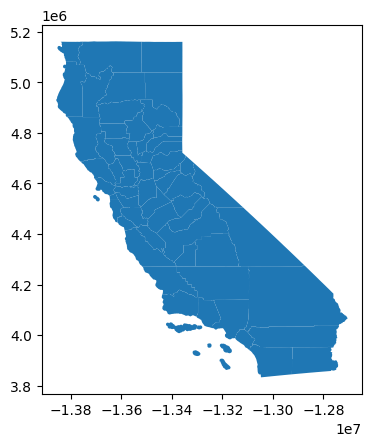

In [24]:
Geo.geometry.plot()

# Modules: modules in progress

In [ ]:
#1

# End of modules
- - -
- - -
- - -


In [5]:
def county_plot(Geo, column): 
    if column in list(Geo.columns.values):
        Geo.reset_index(inplace = True)
        Geo.set_index('index',inplace = True)
        fig = px.choropleth_mapbox(Geo,
                                   geojson=Geo.geometry,
                                   locations=Geo.index,
                                   color = column,
                                   mapbox_style="carto-positron",
                                   center = {"lat":37.1661,"lon":-119.4494},
                                   zoom=5,
                                   color_continuous_scale="Viridis"
                                   )
        
        fig.update_geos(fitbounds="locations", visible=False)
        
        return fig, Geo
    else: 
        return "invalid column name"

In [4]:
def demographic_plot(frame, column, counties = ['Monterey','Los Angeles','Kern','Fresno','Mendocino'], geometry_level = 'county'): 
    if (geometry_level in list(frame.geometry_type.unique())):
            frame = frame.loc[frame['geometry_type'] == geometry_level]
    else: return 'invalid geometry level'
    
    if (counties != []):
        frame = frame.loc[frame['county_name'].isin(counties)]
        
    if column in list(frame.columns.values):
        #frame = frame[[column,'geometry']]
        
        frame.reset_index(inplace = True)
        frame.set_index('index',inplace = True)
        
        fig = px.choropleth_mapbox(frame,
                                   geojson=frame.geometry,
                                   locations=frame.index,
                                   color = column,
                                   mapbox_style="carto-positron",
                                   center = {"lat":37.1661,"lon":-119.4494},
                                   zoom=5,
                                   color_continuous_scale="Viridis"
                                   )
        
        fig.update_geos(fitbounds="locations", visible=False)
        
        return fig, frame
    else: 
        return "invalid column name"

In [5]:
figure, frame = demographic_plot(frame = Geo,column = "median_household_income", geometry_level = 'tract')

In [19]:
#figure

In [22]:
bigframe.columns.values

array(['STATEFP', 'COUNTYFP', 'TRACTFP', 'FIPS GEOID', 'NAME',
       'Geo_QNAME', 'MTFCC', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'FIPS', 'state', 'state_fips', 'county', 'tract', 'geoid',
       'area_name', 'area_land', 'total_pop', 'housing_units',
       'owner_occupied_housing_units', 'persons_no_health_insurance',
       'families', 'families_income_below_poverty_level',
       'median_household_income', 'nh_white_alone',
       'nh_black_or_african_american_alone',
       'nh_american_indian_and_alaska_native_alone', 'nh_asian_alone',
       'nh_native_hawaiian_and_other_pacific_islander_alone', 'nh_other',
       'nh_two_or_more', 'hispanic_or_latino',
       'households_receiving_assistance', 'households',
       'pct_owner_occupied', 'pct_no_health_insurance',
       'pct_families_income_below_poverty_level',
       'pct_households_receiving_assistance', 'pct_nh_white_alone',
       'pct_nh_black_or_african_american_alone',
       'pct_nh_american_indian_and_alask

In [24]:
bigframe.total_pop.isna().sum()

1176

In [31]:
county, countyframe = demographic_plot(frame = Geo,column = "test", geometry_level = 'county')

In [1]:
#county

In [29]:
alll,bigframe = demographic_plot(frame = Geo,column = "test", geometry_level = 'tract')

In [2]:
#alll

In [13]:
counties = ['Monterey','Los Angeles','Kern','Fresno','Mendocino']

In [16]:
frame.shape

(2806, 61)

In [15]:
Geo.loc[(Geo['geometry_type'] == 'tract') & (Geo['county_name'].isin(counties))]

,STATEFP,COUNTYFP,TRACTFP,FIPS GEOID,NAME,Geo_QNAME,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,FIPS,state,state_fips,county,tract,geoid,area_name,area_land,total_pop,housing_units,owner_occupied_housing_units,persons_no_health_insurance,families,families_income_below_poverty_level,median_household_income,nh_white_alone,nh_black_or_african_american_alone,nh_american_indian_and_alaska_native_alone,nh_asian_alone,nh_native_hawaiian_and_other_pacific_islander_alone,nh_other,nh_two_or_more,hispanic_or_latino,households_receiving_assistance,households,pct_owner_occupied,pct_no_health_insurance,pct_families_income_below_poverty_level,pct_households_receiving_assistance,pct_nh_white_alone,pct_nh_black_or_african_american_alone,pct_nh_american_indian_and_alaska_native_alone,pct_nh_asian_alone,pct_nh_native_hawaiian_and_other_pacific_islander_alone,pct_nh_other,pct_nh_two_or_more,pct_hispanic_or_latino,geometry_type,county_name,COUNTYNS,StateCountyFIPS,NAMELSAD,LSAD,CLASSFP,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,geometry,test
11,06,053,011303,06053011303,113.03,Census Tract 113.03,G5020,611365219,6031155,+36.1770603,-121.2767662,06053011303,ca,6.0,53.0,11303.0,14000US06053011303,Census Tract 113.03,236.025730,4116.0,1456.0,1124.0,223.0,1026.0,62.0,94386.0,1688.0,1.0,0.0,18.0,0.0,0.0,141.0,2268.0,1090.0,1347.0,0.771978,0.054179,0.060429,0.809206,0.410107,0.000243,0.000000,0.004373,0.0,0.000000,0.034257,0.551020,tract,Monterey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-121.29262 36.09476, -121.2925...",1
12,06,053,011400,06053011400,114,Census Tract 114,G5020,2147483647,49216659,+35.9668581,-120.9172021,06053011400,ca,6.0,53.0,11400.0,14000US06053011400,Census Tract 114,829.148107,4428.0,1495.0,745.0,155.0,913.0,91.0,78555.0,2684.0,99.0,78.0,141.0,0.0,9.0,199.0,1218.0,575.0,1193.0,0.498328,0.035005,0.099671,0.481978,0.606143,0.022358,0.017615,0.031843,0.0,0.002033,0.044941,0.275068,tract,Monterey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-120.94079 35.79244, -120.9410...",1
13,06,053,011302,06053011302,113.02,Census Tract 113.02,G5020,1896351,0,+36.2128108,-121.1254387,06053011302,ca,6.0,53.0,11302.0,14000US06053011302,Census Tract 113.02,0.729759,6003.0,1490.0,251.0,1022.0,1163.0,191.0,46280.0,365.0,0.0,0.0,442.0,0.0,43.0,45.0,5108.0,2201.0,1307.0,0.168456,0.170248,0.164230,1.684009,0.060803,0.000000,0.000000,0.073630,0.0,0.007163,0.007496,0.850908,tract,Monterey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-121.11943 36.21940, -121.1187...",1
165,06,053,011900,06053011900,119,Census Tract 119,G5020,20880932,3083834,+36.5852187,-121.9452821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tract,Monterey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-121.92678 36.60062, -121.9263...",1
166,06,053,011000,06053011000,110,Census Tract 110,G5020,489637244,1554836,+36.3913637,-121.6806215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tract,Monterey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-121.64480 36.27620, -121.6478...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7868,06,019,005518,06019005518,55.18,Census Tract 55.18,G5020,3149792,0,+36.8604783,-119.6447906,06019005518,ca,6.0,19.0,5518.0,14000US06019005518,Census Tract 55.18,1.249061,6347.0,2107.0,1568.0,405.0,1537.0,24.0,116759.0,3417.0,172.0,0.0,1070.0,0.0,0.0,212.0,1476.0,2290.0,1990.0,0.744186,0.063810,0.015615,1.150754,0.538365,0.027099,0.000000,0.168584,0.0,0.000000,0.033402,0.232551,tract,Fresno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-119.64747 36.86643, -119.6423...",1
7869,06,019,006404,06019006404,64.04,Census Tract 64.04,G5020,6020

In [9]:
len(list(Geo.NAME.unique()))

6577

In [17]:
frame.median_household_income.isna().sum()

468

In [23]:
geo.county_name.isna().sum()

0